## Importing necessary packages

In [5]:
# import the necessary libraries
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns
import re

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from collections import Counter

import nltk
from nltk import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Loading dataset and cleaning the data

### Importing dataset and checking for null/NaN values in the dataset

In [6]:
data=pd.read_csv("amazon_review.csv")
data.head()

,id,marketplace,review_date,customer_id,review_id,product_id,product_parent,product_title,product_category,total_rating,product_rating,shipment_rating,seller_rating,helpful_votes,total_votes,review_headline,review_body
0,0,US,31-08-2015,16414143,R3W4P9UBGNGH1U,B00YL0EKWE,852431543,LG G4 Case Hard Transparent Slim Clear Cover f...,Wireless,2,2,NaN,NaN,1,3,"Looks good, functions meh",2 issues - Once I turned on the circle apps an...
1,1,US,31-08-2015,50800750,R15V54KBMTQWAY,B00XK95RPQ,516894650,Selfie Stick Fiblastiq&trade; Extendable Wirel...,Wireless,4,4,NaN,NaN,0,0,A fun little gadget,"I’m embarrassed to admit that until recently, ..."
2,2,US,31-08-2015,15184378,RY8I449HNXSVF,B00SXRXUKO,984297154,Tribe AB40 Water Resistant Sports Armband with...,Wireless,5,5,NaN,NaN,0,0,Five Stars,Fits iPhone 6 well
3,3,US,31-08-2015,10203548,R18TLJYCKJFLSR,B009V5X1CE,279912704,RAVPower® Element 10400mAh External Battery US...,Wireless,5,5,NaN,NaN,0,0,Great charger,Great charger. I easily get 3+ charges on a Sa...
4,4,US,31-08-2015,488280,R1NK26SWS53B8Q,B00D93OVF0,662791300,Fosmon Micro USB Value Pack Bundle for Samsung...,Wireless,5,5,NaN,NaN,0,0,Five Stars,Great for the price :-)


In [5]:
#check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                637 non-null    int64  
 1   marketplace       637 non-null    object 
 2   review_date       637 non-null    object 
 3   customer_id       637 non-null    int64  
 4   review_id         637 non-null    object 
 5   product_id        637 non-null    object 
 6   product_parent    637 non-null    int64  
 7   product_title     637 non-null    object 
 8   product_category  637 non-null    object 
 9   total_rating      637 non-null    int64  
 10  product_rating    637 non-null    int64  
 11  shipment_rating   24 non-null     float64
 12  seller_rating     15 non-null     float64
 13  helpful_votes     637 non-null    int64  
 14  total_votes       637 non-null    int64  
 15  review_headline   637 non-null    object 
 16  review_body       637 non-null    object 
dt

In [6]:
#check for the missing data
print(np.sum(data.marketplace.isnull()))
print(np.sum(data.review_date.isnull()))
print(np.sum(data.customer_id.isnull()))
print(np.sum(data.review_id.isnull()))
print(np.sum(data.product_id.isnull()))
print(np.sum(data.product_parent.isnull()))
print(np.sum(data.product_title.isnull()))
print(np.sum(data.product_category.isnull()))
print(np.sum(data.total_rating.isnull()))
print(np.sum(data.product_rating.isnull()))
print(np.sum(data.shipment_rating.isnull()))
print(np.sum(data.seller_rating.isnull()))
print(np.sum(data.helpful_votes.isnull()))
print(np.sum(data.total_votes.isnull()))
print(np.sum(data.review_headline.isnull()))
print(np.sum(data.review_body.isnull()))
# the missing data is due to the reviews about shipping and seller are not presnet

0
0
0
0
0
0
0
0
0
0
613
622
0
0
0
0


In [7]:
#replace the data with zero
data.replace(np.nan,0,inplace = True)
data.head()

,id,marketplace,review_date,customer_id,review_id,product_id,product_parent,product_title,product_category,total_rating,product_rating,shipment_rating,seller_rating,helpful_votes,total_votes,review_headline,review_body
0,0,US,31-08-2015,16414143,R3W4P9UBGNGH1U,B00YL0EKWE,852431543,LG G4 Case Hard Transparent Slim Clear Cover f...,Wireless,2,2,0.0,0.0,1,3,"Looks good, functions meh",2 issues - Once I turned on the circle apps an...
1,1,US,31-08-2015,50800750,R15V54KBMTQWAY,B00XK95RPQ,516894650,Selfie Stick Fiblastiq&trade; Extendable Wirel...,Wireless,4,4,0.0,0.0,0,0,A fun little gadget,"I’m embarrassed to admit that until recently, ..."
2,2,US,31-08-2015,15184378,RY8I449HNXSVF,B00SXRXUKO,984297154,Tribe AB40 Water Resistant Sports Armband with...,Wireless,5,5,0.0,0.0,0,0,Five Stars,Fits iPhone 6 well
3,3,US,31-08-2015,10203548,R18TLJYCKJFLSR,B009V5X1CE,279912704,RAVPower® Element 10400mAh External Battery US...,Wireless,5,5,0.0,0.0,0,0,Great charger,Great charger. I easily get 3+ charges on a Sa...
4,4,US,31-08-2015,488280,R1NK26SWS53B8Q,B00D93OVF0,662791300,Fosmon Micro USB Value Pack Bundle for Samsung...,Wireless,5,5,0.0,0.0,0,0,Five Stars,Great for the price :-)


In [8]:
print(np.sum(data.marketplace.isnull()))
print(np.sum(data.review_date.isnull()))
print(np.sum(data.customer_id.isnull()))
print(np.sum(data.review_id.isnull()))
print(np.sum(data.product_id.isnull()))
print(np.sum(data.product_parent.isnull()))
print(np.sum(data.product_title.isnull()))
print(np.sum(data.product_category.isnull()))
print(np.sum(data.total_rating.isnull()))
print(np.sum(data.product_rating.isnull()))
print(np.sum(data.shipment_rating.isnull()))
print(np.sum(data.seller_rating.isnull()))
print(np.sum(data.helpful_votes.isnull()))
print(np.sum(data.total_votes.isnull()))
print(np.sum(data.review_headline.isnull()))
print(np.sum(data.review_body.isnull()))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


### Removing special characters and numbers from reviews and also changing all the reviews to lower case

In [9]:
# Remove special characters and numbers
data['review'] = data['review_body'].apply(lambda x: re.sub('[^a-zA-Z]',' ',x))

#Lower cased reviews
data['review'] = data['review'].apply(lambda x: x.lower())

In [10]:
num_reviews = len(data)
num_words = data['review'].apply(lambda x: len(x.split())).sum()
num_unique_words = len(set(' '.join(data['review']).split()))

### Word frequency and lengths

In [11]:
word_freq = Counter(' '.join(data['review']).split())
top_words = word_freq.most_common(20)

In [12]:
review_lengths = data['review_body'].apply(lambda x: len(x.split()))

mean_length = review_lengths.mean()
median_length = review_lengths.median()
min_length = review_lengths.min()
max_length = review_lengths.max()
std_length = review_lengths.std()

### Removing the commonly used stopwords in EN and storing the rest in a new column 'reviewTokens'

In [17]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    tokens = [porter.stem(token) for token in tokens]
    return tokens

data['reviewTokens'] = data['review_body'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dmitry/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/dmitry/nltk_data'
    - '/Users/dmitry/.conda/envs/adspc1/nltk_data'
    - '/Users/dmitry/.conda/envs/adspc1/share/nltk_data'
    - '/Users/dmitry/.conda/envs/adspc1/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [18]:
all_tokens = [token for review in data['reviewTokens'] for token in review]
word_counts = Counter(all_tokens)

KeyError: 'reviewTokens'

### Sentiment Analysis

In [19]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each review
sentiment_scores = data['review_body'].apply(lambda x: sia.polarity_scores(x))

# Convert sentiment scores to sentiment labels
sentiment_labels = sentiment_scores.apply(lambda x: 'positive' if x['compound'] > 0 
                                          else ('negative' if x['compound'] < 0 else 'neutral'))

## Visualizations

Number of reviews: 637
Number of words: 22496
Number of unique words: 3047


([<matplotlib.patches.Wedge at 0x183974550>,
 [Text(-1.001907925296105, 0.45407103984823227, 'Non-Unique'),
  Text(1.0019079040395042, -0.4540710867509268, 'Unique')],
 [Text(-0.5464952319796935, 0.2476751126444903, '86%'),
  Text(0.546495220385184, -0.2476751382277782, '14%')])

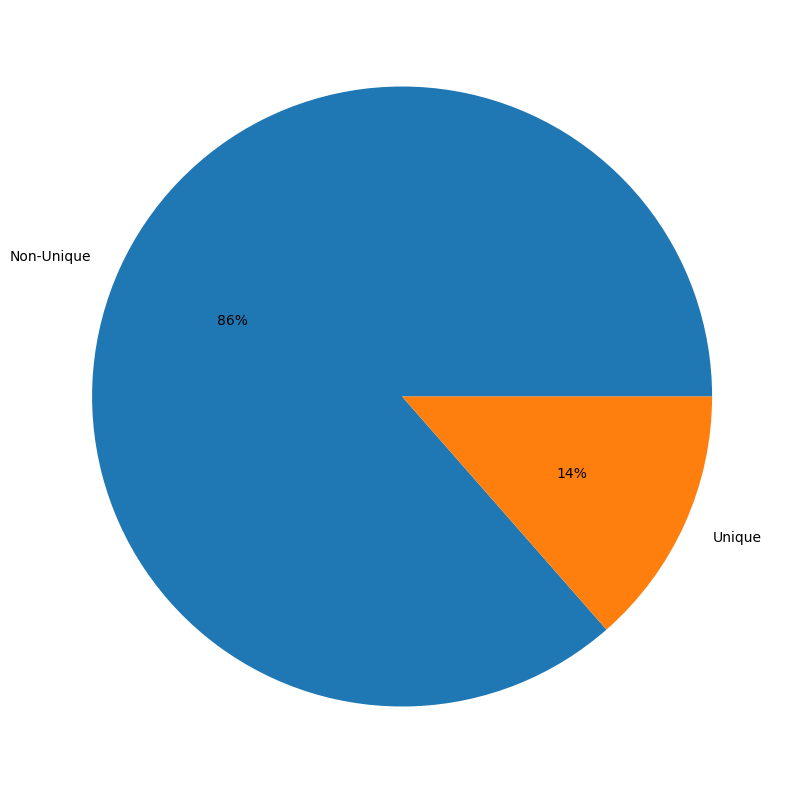

In [25]:
print("Number of reviews:", num_reviews)
print("Number of words:", num_words)
print("Number of unique words:", num_unique_words)

plt.pie(x=[num_words - num_unique_words, num_unique_words], labels=['Non-Unique', 'Unique'], autopct='%.0f%%')

In [26]:
for word, freq in top_words:
    print(word, ":", freq)

the : 1130
i : 729
and : 604
to : 566
a : 545
it : 530
is : 339
of : 328
for : 271
this : 268
in : 233
you : 233
my : 231
but : 215
they : 208
that : 207
on : 201
are : 182
not : 181
with : 178


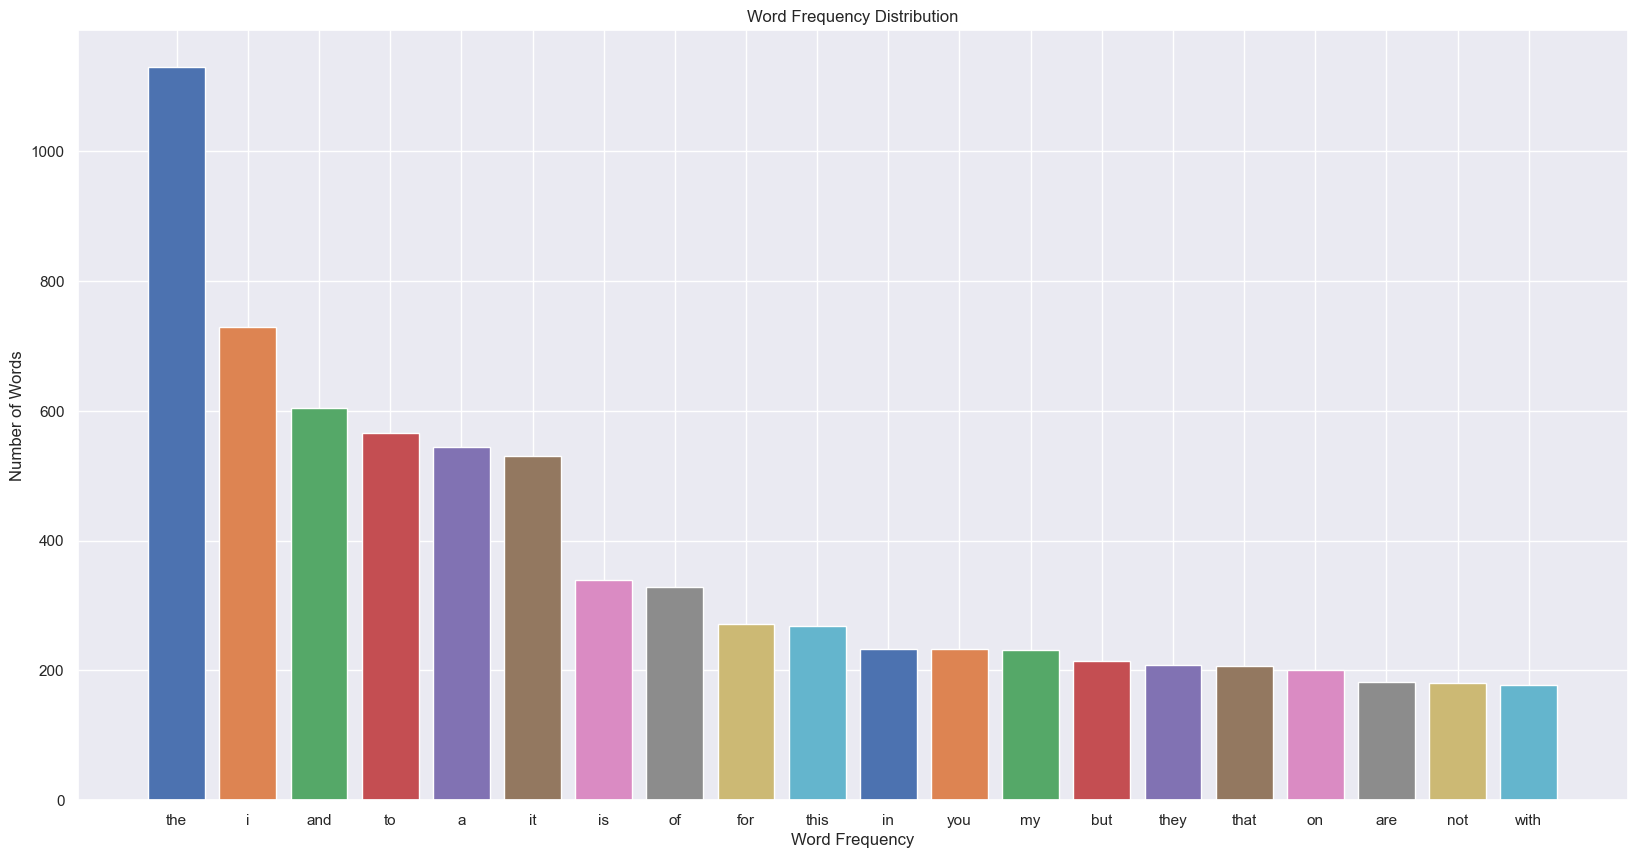

In [44]:
# Plot word frequency distribution
freq_dist = Counter(word_freq.values())
# print(freq_dist.keys(), freq_dist.values())
for word, freq in top_words:
    plt.bar(word, freq)
plt.title("Word Frequency Distribution")
plt.xlabel("Word Frequency")
plt.ylabel("Number of Words")
plt.rcParams['figure.figsize'] = [10, 20]
plt.show()

<Axes: >

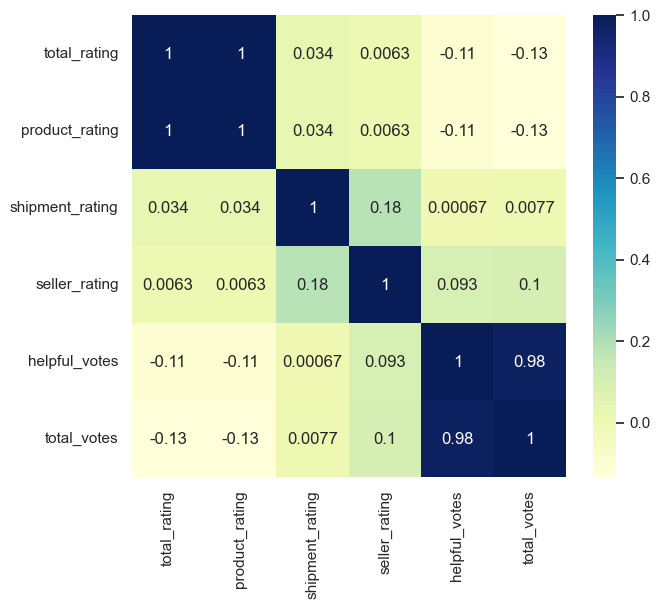

In [33]:
sns.set (rc = {'figure.figsize':(7, 6)})
sns.heatmap(data.loc[:, ~data.columns.isin(['id', 'customer_id', 'product_parent'])].corr(), annot=True, cmap="YlGnBu")

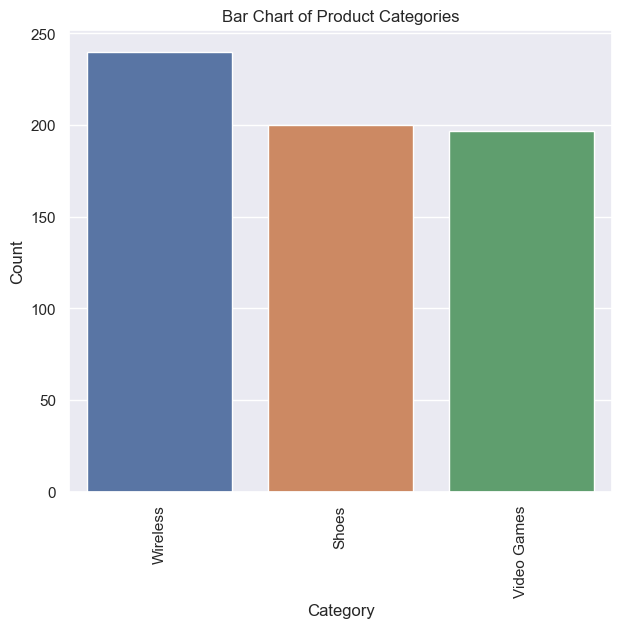

In [34]:
# Bar chart of the most common product categories
sns.countplot(x='product_category', data=data, order=data['product_category'].value_counts().index)
plt.title('Bar Chart of Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

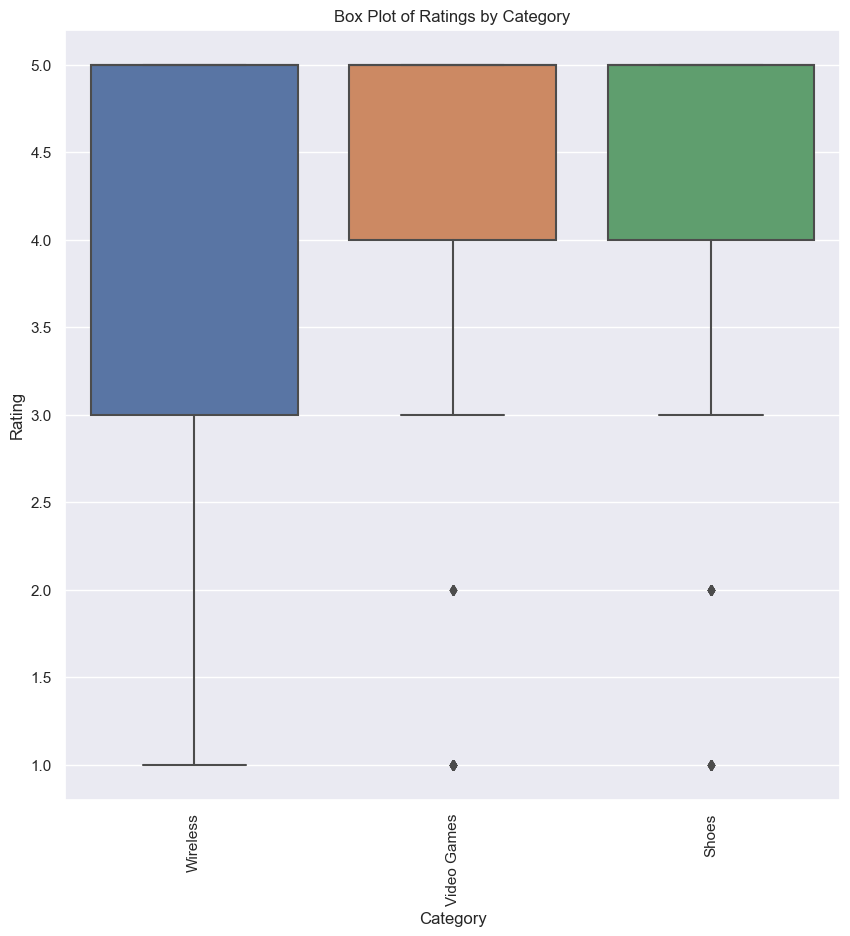

In [35]:
# Box plot of ratings by category
sns.boxplot(x='product_category', y='total_rating', data=data)
plt.title('Box Plot of Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()


Review length summary statistics:
Mean: 34.92150706436421 words
Median: 14.0 words
Minimum: 1 words
Maximum: 1203 words
Standard deviation: 89.48962621578497 words


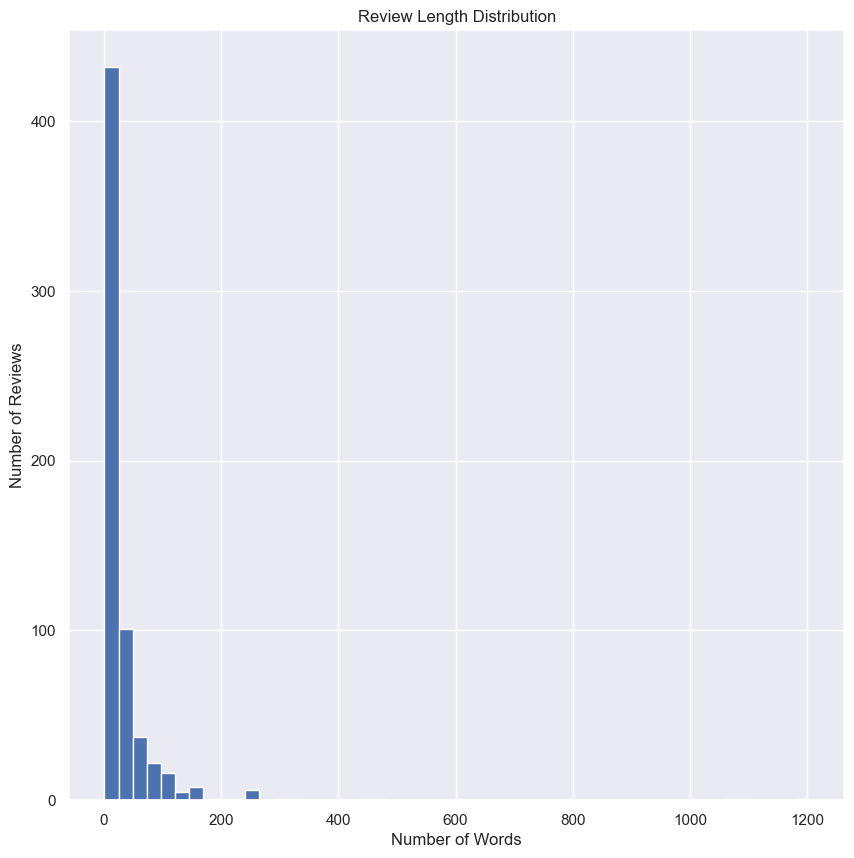

In [36]:
print("\nReview length summary statistics:")
print("Mean:", mean_length, "words")
print("Median:", median_length, "words")
print("Minimum:", min_length, "words")
print("Maximum:", max_length, "words")
print("Standard deviation:", std_length, "words")

# Plot review length distribution
plt.hist(review_lengths, bins=50)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

<Axes: >

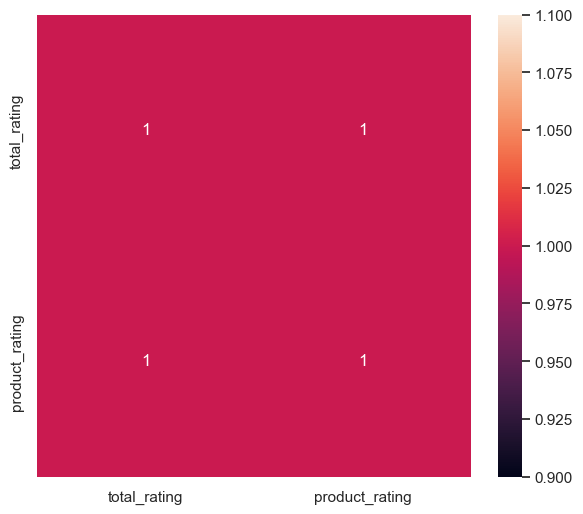

In [37]:
sns.set (rc = {'figure.figsize':(7, 6)})
sns.heatmap(data[['total_rating', 'product_rating']].corr(), annot=True)

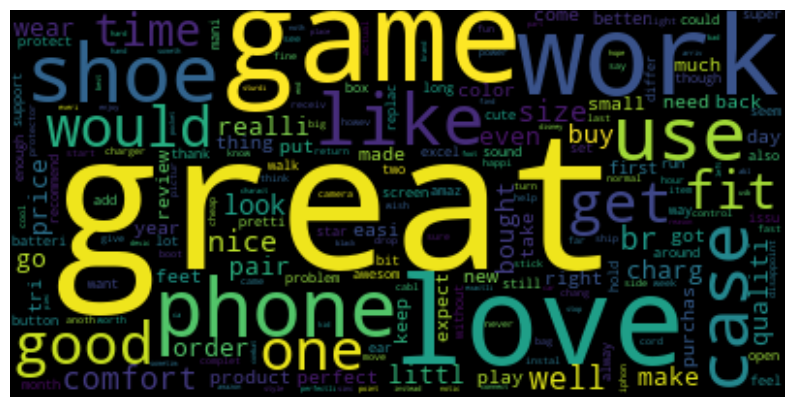

In [35]:
wordcloud = WordCloud().generate_from_frequencies(word_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()


Sentiment label distribution:
positive    502
negative     78
neutral      57
Name: review_body, dtype: int64


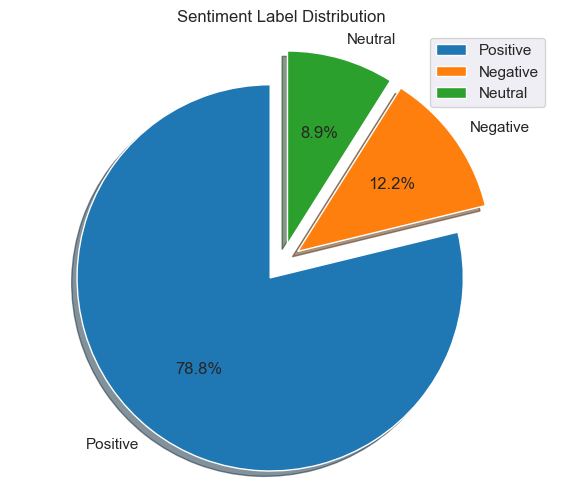

In [38]:
# Print sentiment label distribution
print("\nSentiment label distribution:")
print(sentiment_labels.value_counts())
# print(sentiment_labels.dtype)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
explode = [0.1, 0.1, 0.1]

# Create a pie chart of sentiment label distribution
labels = ['Positive', 'Negative', 'Neutral']
sizes = [sentiment_labels.value_counts()[0], sentiment_labels.value_counts()[1], sentiment_labels.value_counts()[2]]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)

# Add a title and legend
plt.title('Sentiment Label Distribution')
plt.legend(labels, loc='upper right')

# Set the aspect ratio to be equal so that the chart is circular
plt.axis('equal')
plt.show()

<Axes: ylabel='Density'>

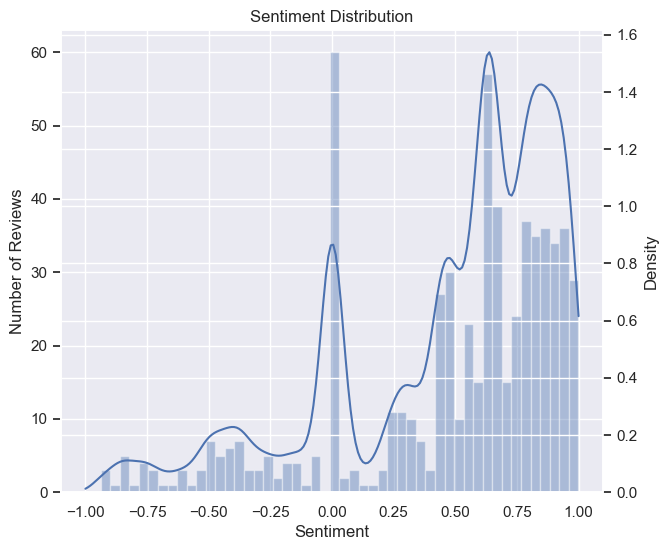

In [40]:
sid = SentimentIntensityAnalyzer()
sentiment_scores = data['review_body'].apply(lambda x: sid.polarity_scores(x))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.set (rc = {'figure.figsize':(7, 6)})
sns.distplot([x['compound'] for x in np.array(sentiment_scores)], kde=False, bins=50, ax=ax1,
             kde_kws={'clip': (-1.0, 1.0)}).set(xlabel='Sentiment', ylabel='Number of Reviews', title='Sentiment Distribution')
sns.distplot([x['compound'] for x in np.array(sentiment_scores)], hist=False, bins=50, ax=ax2, 
             kde_kws={'clip': (-1.0, 1.0), 'bw': 0.1})

[Text(0.5, 1.0, 'Total Rating Distribution'),
 Text(0.5, 0, 'Total Rating'),
 Text(0, 0.5, 'Number of Reviews')]

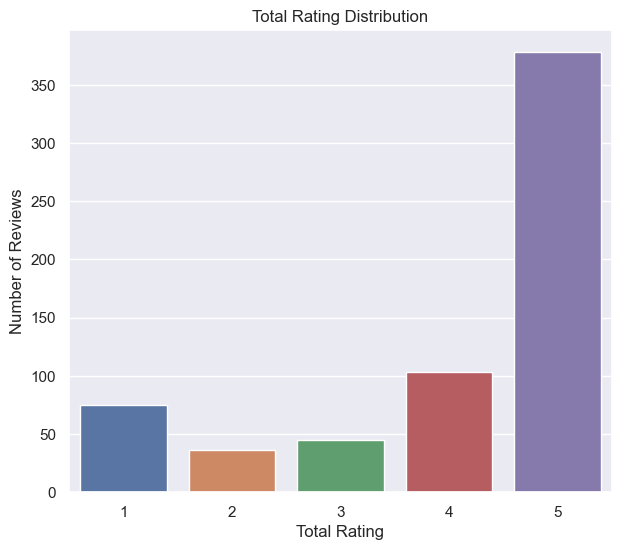

In [42]:
sns.countplot(data, x='total_rating').set(title='Total Rating Distribution', xlabel='Total Rating', ylabel='Number of Reviews')

[Text(0.5, 1.0, 'Shipment rating distribution'),
 Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'Number of reviews')]

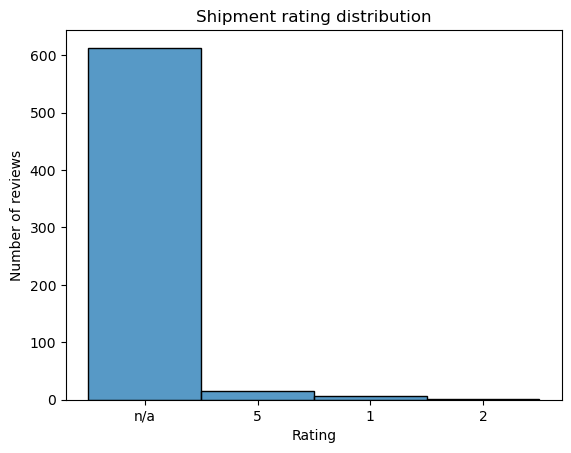

In [18]:
sns.histplot(['n/a' if x == '0' else x for x in np.array(data['shipment_rating'].astype(int).astype(str))]).set(title='Shipment rating distribution', xlabel='Rating', ylabel='Number of reviews')

[Text(0.5, 1.0, 'Seller rating distribution'),
 Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'Number of reviews')]

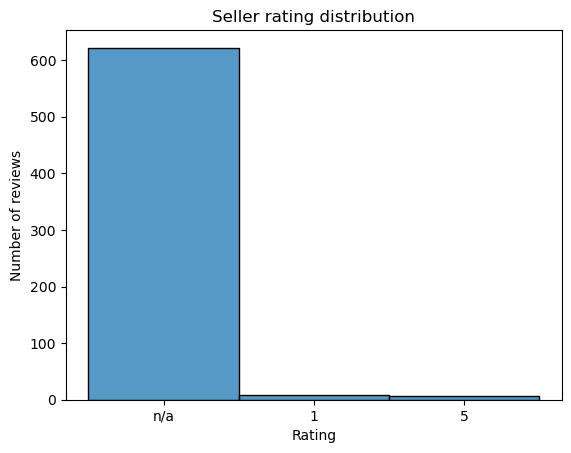

In [19]:
sns.histplot(['n/a' if x == '0' else x for x in np.array(data['seller_rating'].astype(int).astype(str))]).set(title='Seller rating distribution', xlabel='Rating', ylabel='Number of reviews')